In [1]:
import numpy as np, humanfriendly as hf
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_scores(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, y_test)
    name = model.__class__.__name__
    return (name, train, test, ypred)

In [3]:
def see_time(note,start):
    end = time.perf_counter()
    elapsed = end - start
    print (note,hf.format_timespan(elapsed, detailed=True))

In [4]:
def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

In [5]:
X_file = 'data/X_mnist'
y_file = 'data/y_mnist'
X = np.load('data/X_mnist.npy')
y = np.load('data/y_mnist.npy')

In [6]:
X = X.astype(np.float32)
# need allow_pickle=True parameter
bp = np.load('data/bp_mnist_et.npy', allow_pickle=True)
bp = bp.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
et = ExtraTreesClassifier(**bp, random_state=0,n_estimators=200)
start = time.perf_counter()
et.fit(X_train, y_train)
et_scores = get_scores(et, X_train, y_train,X_test, y_test)
y_pred = et_scores[3]
cm = confusion_matrix(y_test, y_pred)
see_time('total time:',start)
print (et_scores[0] + 'train:',et_scores[1],'test:',et_scores[2])

total time: 1 minute, 26 seconds, 14 milliseconds, 25 microseconds and 500 nanoseconds
ExtraTreesClassifiertrain: 1.0 test: 0.9732


Text(33.0, 0.5, 'predicted value')

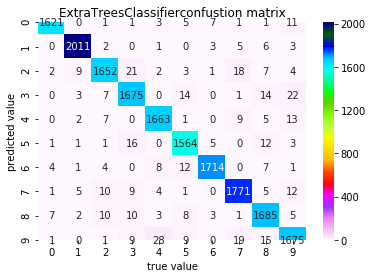

In [8]:
plt.figure(1)
ax = plt.axes()
sns.heatmap(cm.T, annot=True, fmt="d",cmap='gist_ncar_r', ax=ax)
ax.set_title(et_scores[0] + 'confustion matrix')
plt.xlabel('true value')
plt.ylabel('predicted value')

In [9]:
indx = find_misses(y_test, y_pred)
print ('pred', 'actual')
misses = [(y_pred[row], y_test[row], i) for i, row in enumerate(indx)]
[print (row[0], '  ', row[1]) for i, row in enumerate(misses) if i < 10]

pred actual
3.0    9.0
7.0    3.0
4.0    9.0
2.0    3.0
3.0    2.0
6.0    5.0
9.0    7.0
9.0    3.0
8.0    6.0
9.0    4.0


[None, None, None, None, None, None, None, None, None, None]

In [10]:
img_act = y_test[indx[0]]
img_pred = y_pred[indx[0]]
print ('actual', img_act)
print ('pred', img_pred)
text = str(img_pred)
test_images = X_test.reshape(-1, 28, 28)


actual 9.0
pred 3.0


Text(0.5, 1.0, '9.0 misclassified as 3.0')

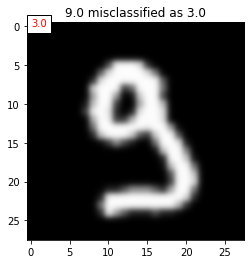

In [11]:
plt.figure(2)
plt.imshow(test_images[indx[0]], cmap='gray',interpolation='gaussian')
plt.text(0, 0.05, text, color='r',
         bbox=dict(facecolor='white'))
title = str(img_act) + ' misclassified as ' + text
plt.title(title)